In [8]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [3]:
# Load and preprocess images from a directory
def load_and_preprocess(path, target_size=(220, 220)):
    images = []
    for filename in os.listdir(path):
        if filename.endswith((".jpg", ".jpeg", ".png")):
            image_path = os.path.join(path, filename)
            img = load_img(image_path, target_size=target_size)
            img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
            images.append(img_array)
    return np.array(images)

# Example: Load images from a directory
path = r'/Users/harshdhiman/Documents/Research /Codes/Turbine Blade Damage Detection/ConvAutoencoderWT/Edge_Area'
image_data = load_and_preprocess(path)


In [4]:
image_data.shape

(241, 220, 220, 3)

In [5]:
# Define the autoencoder model
def build_autoencoder(input_shape):
    model = models.Sequential()

    # Encoder
    model.add(layers.InputLayer(input_shape=input_shape))
    model.add(layers.Conv2D(32, (3, 3), activation='relu',padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2), padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2), padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), padding='same'))

    # Decoder
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(3,(3,3),activation='relu'))
    model.add(layers.UpSampling2D((2, 2)))
    #model.add(layers.UpSampling2D((2, 2))) # 224x224x32
    #model.add(layers.Conv2D(3, (3, 3), activation='relu')) # 222 x 222 x 3
    #model.add(layers.Conv2D(3, (3, 3), activation='sigmoid')) # 220 x 220 x 3
    return model

# Build the autoencoder
input_shape = (220, 220, 3)
autoencoder = build_autoencoder(input_shape)
autoencoder.compile(optimizer='adam', loss='mse')  # Mean Squared Error loss for image reconstruction

In [6]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 220, 220, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 110, 110, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [10]:
# Train the autoencoder (using the same data for input and target)
autoencoder.fit(image_data,image_data, epochs=150, batch_size=32, shuffle=True,
                validation_split=0.1,verbose=1,callbacks=[early_stopping_callback])

Epoch 1/150
7/7 [==============================] - 9s 1s/step - loss: 0.3219 - val_loss: 0.3035
Epoch 2/150
7/7 [==============================] - 10s 1s/step - loss: 0.3221 - val_loss: 0.3036
Epoch 3/150
7/7 [==============================] - 9s 1s/step - loss: 0.3221 - val_loss: 0.3037
Epoch 4/150
7/7 [==============================] - 10s 1s/step - loss: 0.3224 - val_loss: 0.3035
Epoch 5/150
7/7 [==============================] - 10s 1s/step - loss: 0.3222 - val_loss: 0.3031
Epoch 6/150
7/7 [==============================] - 10s 1s/step - loss: 0.3220 - val_loss: 0.3020
Epoch 7/150
7/7 [==============================] - 10s 1s/step - loss: 0.3219 - val_loss: 0.3031
Epoch 8/150
7/7 [==============================] - 10s 1s/step - loss: 0.3222 - val_loss: 0.3024
Epoch 9/150
7/7 [==============================] - 10s 1s/step - loss: 0.3224 - val_loss: 0.3036
Epoch 10/150
7/7 [==============================] - 10s 1s/step - loss: 0.3222 - val_loss: 0.3022
Epoch 11/150
7/7 [=============

In [11]:
# Reconstruct images
reconstructed_images = autoencoder.predict(image_data)

8/8 [==============================] - 3s 304ms/step


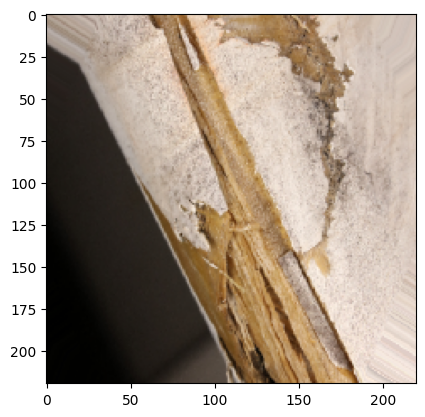

In [12]:
plt.imshow(image_data[10])

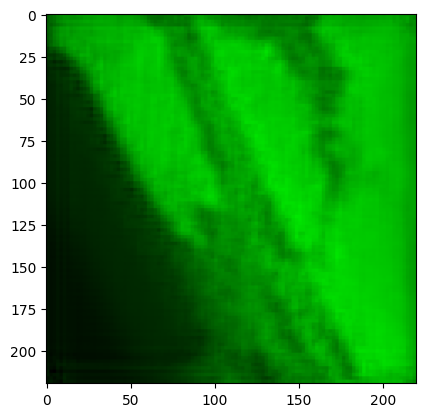

In [13]:
plt.imshow(reconstructed_images[10])